In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cmocean.cm
from matplotlib.ticker import MultipleLocator
import pickle
import pandas as pd
import csv
import pyodbc

In [4]:
Vhalf_est = pickle.load(open("/home/jbaldwin/WorldBank/VULNERABILITY/Vhalf_est_rmsf.p","rb"))


In [5]:
# Emanuel Vulnerability Curves

# V = wind speed
V = np.arange(0,501,1)

# Vthresh = windspeed at and below which no damage occurs
Vthresh = 25 # 50 kts / 1.944 kts per m/s

# Vhalf = windspeed at which half the property value is lost
Vhalf1 = Vhalf_est['NCR']
Vhalf2 = Vhalf_est['Eastern Visayas']

def vcurve(V,Vthresh,Vhalf):
    vn = np.zeros(np.shape(V))
    for i in range(len(V)):
        vn[i] = np.max([V[i]-Vthresh,0])/(Vhalf-Vthresh)
    # f = fraction of property value lost
    f = vn**3/(1+vn**3)
    return f

f1 = vcurve(V,Vthresh,Vhalf1)
f2 = vcurve(V,Vthresh,Vhalf2)

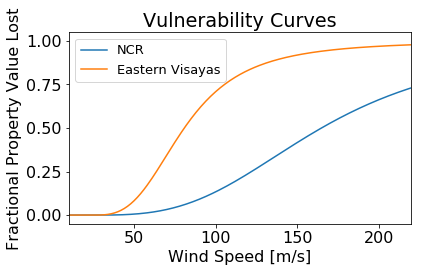

In [25]:
plt.rcParams.update({'font.size': 16})
plt.plot(V,f1,label='NCR')
plt.plot(V,f2,label='Eastern Visayas')
plt.xlabel('Wind Speed [m/s]')
plt.ylabel('Fractional Property Value Lost')
plt.title('Vulnerability Curves')
plt.legend(fontsize=13)
plt.xlim([10,220])
plt.tight_layout()
plt.savefig('/home/jbaldwin/WorldBank/FIGURES/vulnerabilitycurves_rmsf.png',dpi=400)


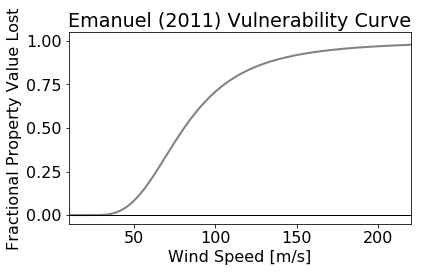

In [13]:
plt.rcParams.update({'font.size': 16})
#plt.plot(V,f1,label='NCR')
plt.plot(V,f2,label='Eastern Visayas',color='grey',linewidth=2)
plt.xlabel('Wind Speed [m/s]')
plt.ylabel('Fractional Property Value Lost')
plt.title('Emanuel (2011) Vulnerability Curve')
#plt.legend(fontsize=13)
plt.xlim([10,220])
plt.tight_layout()
plt.axhline(0,color='k',linewidth=1)
plt.savefig('/home/jbaldwin/WorldBank/FIGURES/example_vcurve.png',dpi=400)


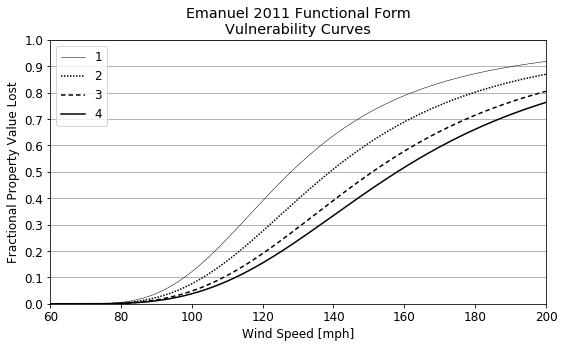

In [41]:
plt.figure(figsize=(8,5))

Vthresh = 70
f1 = vcurve(V,Vthresh,128)
f2 = vcurve(V,Vthresh,139)
f3 = vcurve(V,Vthresh,151)
f4 = vcurve(V,Vthresh,158)

plt.rcParams.update({'font.size': 12})
ax = plt.subplot(111)
plt.plot(V,f1,label='1',color='k',linewidth=0.5)
plt.plot(V,f2,label='2',color='k',dashes=[1,1])
plt.plot(V,f3,label='3',color='k',dashes=[3,2])
plt.plot(V,f4,label='4',color='k')
plt.xlabel('Wind Speed [mph]')
plt.ylabel('Fractional Property Value Lost')
plt.title('Emanuel 2011 Functional Form\nVulnerability Curves')
ml = MultipleLocator(0.1)
ax.yaxis.set_minor_locator(ml)
ax.yaxis.grid(b=True, which='both')
plt.legend()
plt.xlim([60,200])
plt.ylim([0,1])
plt.xticks(np.arange(60,220,20))
plt.yticks(np.arange(0,1.1,0.1))
plt.tight_layout()
#plt.savefig('FIGURES/vulnerabilitycurves.png',dpi=400)

In [5]:
# set up some constants
MDB = 'c:/data2/jbaldwin/HAZUS/huTemplateGBS.mdb'
DRV = '{Microsoft Access Driver (*.mdb, *.accdb)}'
PWD = 'pw'

# connect to db
con = pyodbc.connect('DRIVER={};DBQ={};PWD={}'.format(DRV,MDB,PWD))
cur = con.cursor()

# run a query and get the results 
SQL = 'SELECT * FROM mytable;' # your query goes here
rows = cur.execute(SQL).fetchall()
cur.close()
con.close()

# you could change the mode from 'w' to 'a' (append) for any subsequent queries
with open('mytable.csv', 'w') as fou:
    csv_writer = csv.writer(fou) # default field-delimiter is ","
    csv_writer.writerows(rows)


Error: ('01000', "[01000] [unixODBC][Driver Manager]Can't open lib 'Microsoft Access Driver (*.mdb, *.accdb)' : file not found (0) (SQLDriverConnect)")